In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models
from torchvision import transforms, utils

In [2]:
import numpy as np
import scipy.misc
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import json

In [3]:
def to_grayscale(image):
    """
    input is (d,w,h)
    converts 3D image tensor to grayscale images corresponding to each channel
    """
    image = torch.sum(image, dim=0)
    image = torch.div(image, image.shape[0])
    return image

In [4]:
def normalize(image):
    normalize = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
    preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalize
    ])
    image = Variable(preprocess(image).unsqueeze(0).cpu())
    return image


def predict(image):
    _, index = vgg(image).data[0].max(0)
#     print(index)
    return str(index[0]), labels[str(index[0])][1]
    
def deprocess(image):
    return image * torch.Tensor([0.229, 0.224, 0.225]).cuda()  + torch.Tensor([0.485, 0.456, 0.406]).cuda()

def load_image(path):
    image = Image.open(path).convert('RGB')
    plt.imshow(image)
    plt.title("Image loaded successfully")
    return image

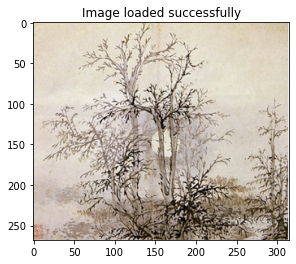

In [5]:
cluster1_img = load_image("./cluster_img/b34소림명월도.jpg")

In [6]:
vgg = models.vgg19(pretrained=True)

In [7]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [8]:
cluster1_img_nor = normalize(cluster1_img)
# print(predict(kitten_2))

In [9]:
modulelist = list(vgg.features.modules())

In [36]:
modulelist[1:][:11]

[Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)),
 ReLU(inplace=True),
 MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False),
 Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))]

In [43]:
modulelist[1:][11](cluster1_img_nor)

tensor([[[[1.7523, 1.7694, 1.7865,  ..., 1.4269, 1.3584, 1.8379],
          [1.7865, 1.7523, 1.7180,  ..., 1.3927, 1.4098, 1.8550],
          [1.7865, 1.7865, 1.7352,  ..., 1.4440, 1.4440, 1.8722],
          ...,
          [0.8961, 1.0673, 1.2214,  ..., 0.0000, 0.0000, 1.3242],
          [1.0673, 1.0159, 1.1700,  ..., 0.0000, 0.0000, 1.1529],
          [1.3070, 1.2728, 1.3242,  ..., 0.0000, 0.2796, 1.4612]],

         [[1.6933, 1.6758, 1.7108,  ..., 1.2906, 1.2731, 1.9209],
          [1.7283, 1.6758, 1.6583,  ..., 1.2556, 1.3256, 1.9384],
          [1.7283, 1.7108, 1.6583,  ..., 1.3256, 1.3606, 1.9384],
          ...,
          [0.1702, 0.4853, 0.7654,  ..., 0.0000, 0.0000, 1.3431],
          [0.6429, 0.6604, 0.9230,  ..., 0.0000, 0.0000, 1.1681],
          [1.2206, 1.1506, 1.1856,  ..., 0.0000, 0.0826, 1.4657]],

         [[1.4897, 1.4722, 1.4897,  ..., 0.9494, 1.0539, 1.9603],
          [1.5245, 1.4374, 1.3851,  ..., 0.9319, 1.0714, 1.9603],
          [1.5071, 1.4722, 1.3851,  ..., 1

In [31]:
def layer_outputs(image, layer_n):
    outputs = []
    names = []
    for layer in modulelist[1:][:layer_n]:
        image = layer(image)
        outputs.append(image)
        names.append(str(layer))
        
    output_im = []
    for i in outputs:
        i = i.squeeze(0)
        temp = to_grayscale(i)
        output_im.append(temp.data.cpu().numpy())
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (100, 100)


    for i in range(len(output_im)):
        a = fig.add_subplot(len(modulelist), 1 ,i+1)
        imgplot = plt.imshow(output_im[i])
        plt.axis('off')
        a.set_title(names[i].partition('(')[0], fontsize=20)

    plt.savefig('./conv_vis/layer_outputs.jpg', bbox_inches='tight')

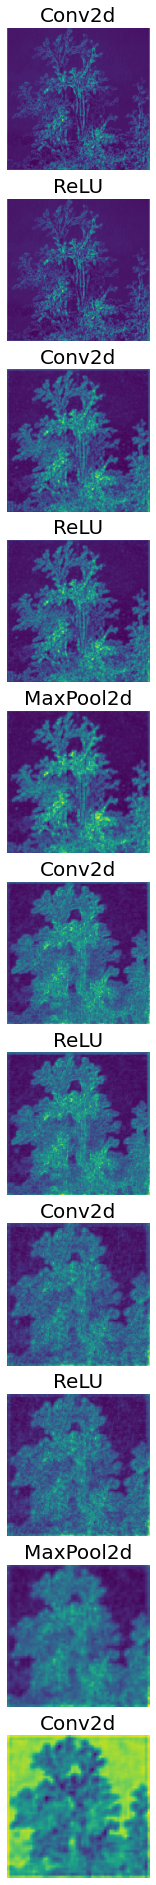

In [38]:
layer_outputs(cluster1_img_nor, 11)

In [25]:
def filter_outputs(image, layer_to_visualize):
    if layer_to_visualize < 0:
        layer_to_visualize += 31
    output = None
    name = None
    for count, layer in enumerate(modulelist[1:]):
        image = layer(image)
        if count == layer_to_visualize: 
            output = image
            name = str(layer)
    
    filters = []
    output = output.data.squeeze()
    for i in range(output.shape[0]):
        filters.append(output[i,:,:])
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)

    for i in range(int(np.sqrt(len(filters))) * int(np.sqrt(len(filters)))):
        fig.add_subplot(np.sqrt(len(filters)), np.sqrt(len(filters)),i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')
    
#     print(len(filters))
#     print(filters[0].shape)
#     print(output.shape)

D:\Anaconda3\envs\oriental_v1\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


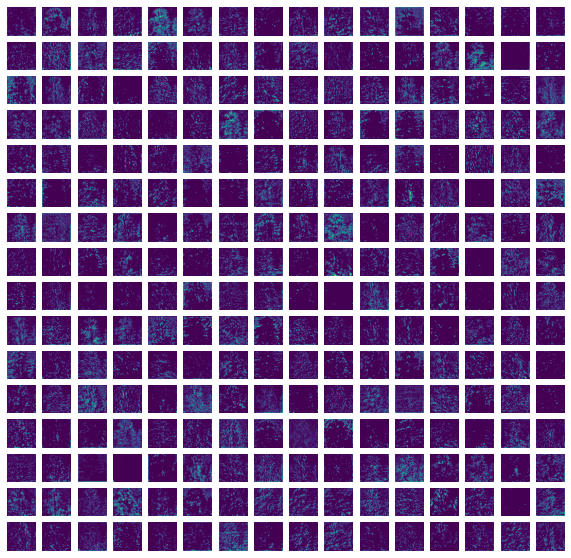

In [27]:
filter_outputs(cluster1_img_nor, 11)

D:\Anaconda3\envs\oriental_v1\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


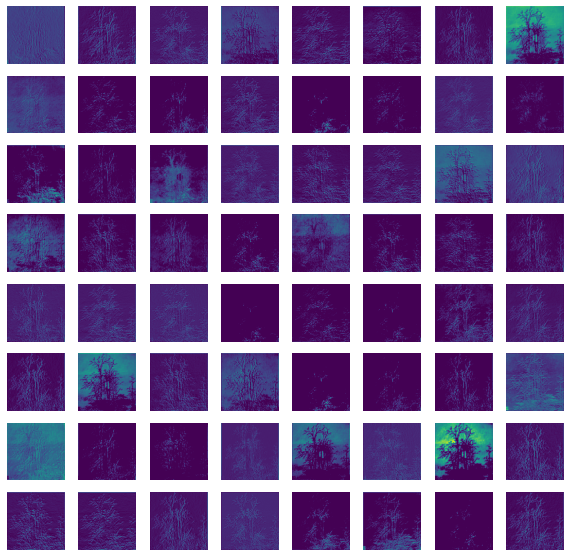

In [28]:
filter_outputs(cluster1_img_nor, 0)

In [39]:
def visualize_weights(image, layer):
    weight_used = []
    for w in vgg.features.children():
        if isinstance(w, torch.nn.modules.conv.Conv2d):
            weight_used.append(w.weight.data)

    filters = []
    for i in range(weight_used[layer].shape[0]):
        filters.append(weight_used[layer][i,:,:,:].sum(dim=0))
        filters[i].div(weight_used[layer].shape[1])
        
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (10, 10)
    for i in range(int(np.sqrt(weight_used[layer].shape[0])) * int(np.sqrt(weight_used[layer].shape[0]))):
        a = fig.add_subplot(np.sqrt(weight_used[layer].shape[0]),np.sqrt(weight_used[layer].shape[0]),i+1)
        imgplot = plt.imshow(filters[i])
        plt.axis('off')

D:\Anaconda3\envs\oriental_v1\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  from ipykernel import kernelapp as app


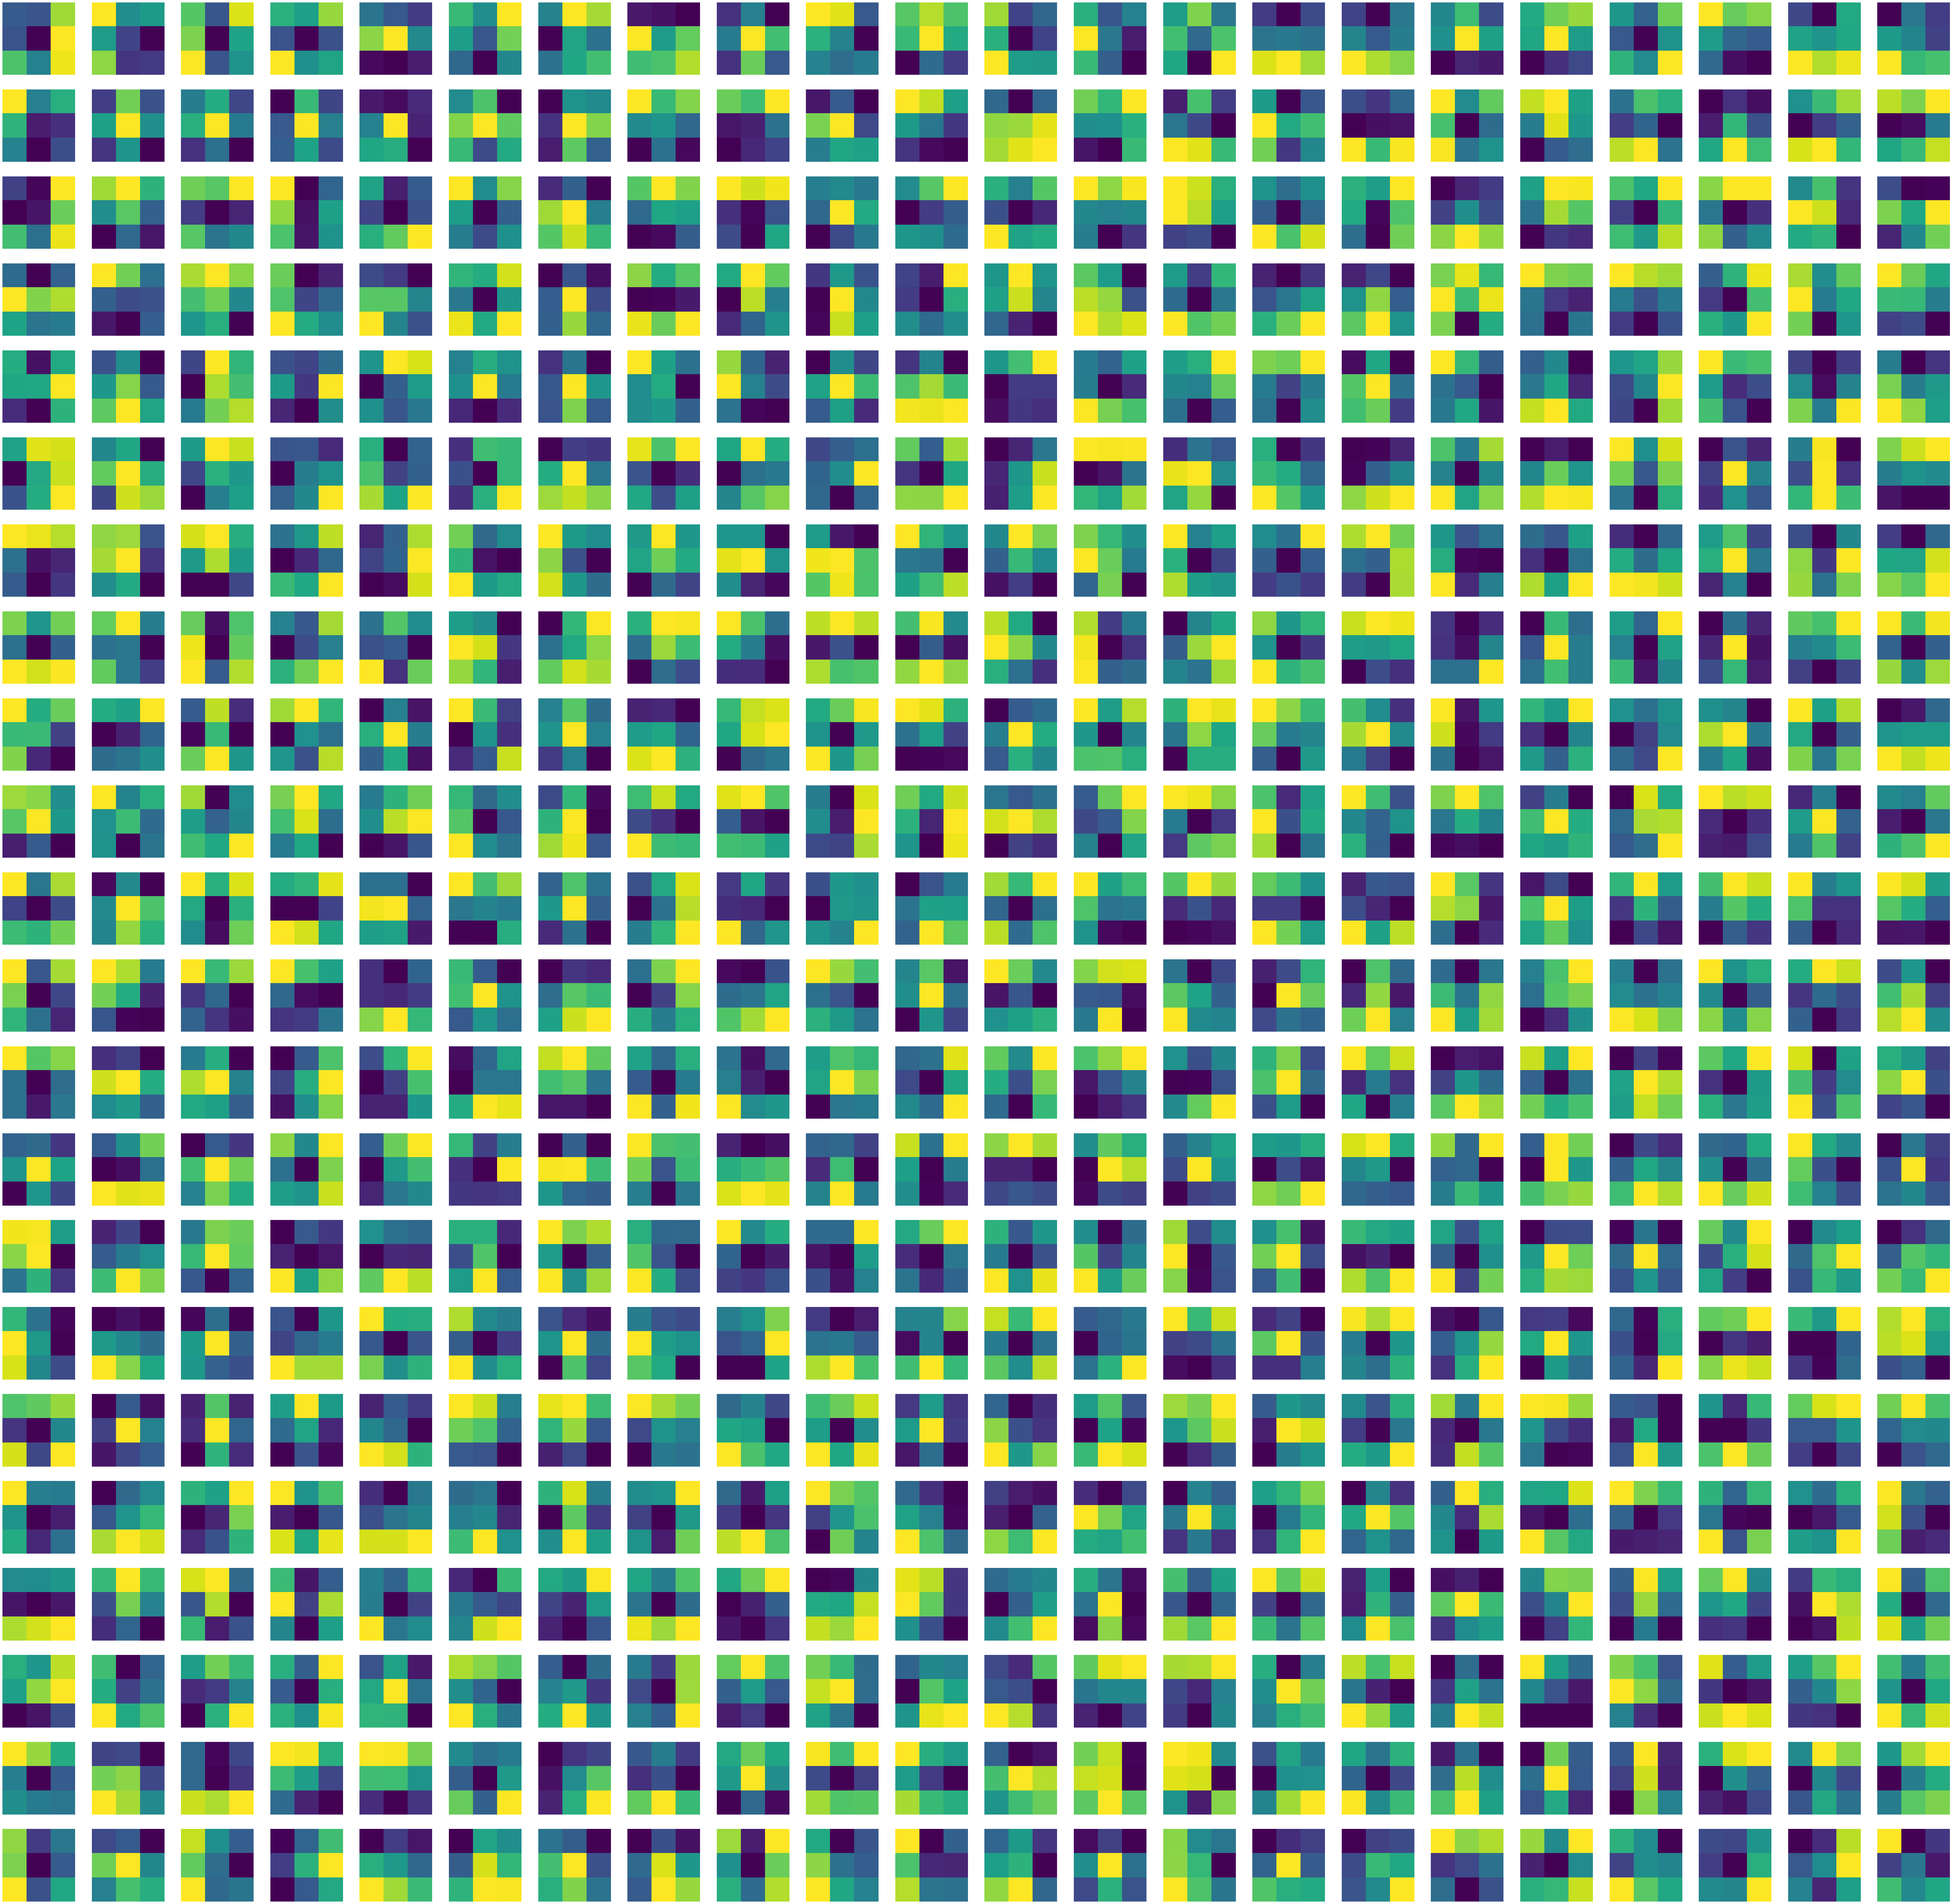

In [40]:
# First conv layer filters
visualize_weights(cluster1_img_nor, 11)

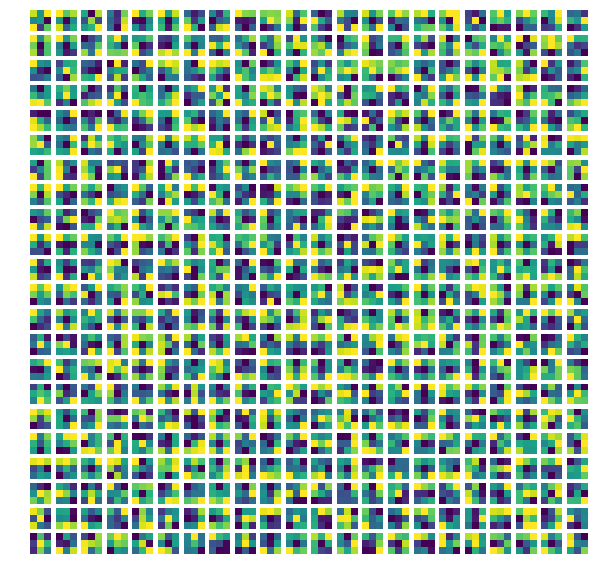

In [21]:
# First conv layer filters
visualize_weights(cluster1_img_nor, -1)

In [22]:
def make_heatmap(image, true_class, k=8, stride=8): 
    """
    Input image is of size (1, c, w, h) typically (1, 3, 224, 224) for vgg16
    true_class is a number corresponding to imagenet classes
    k in the filter size (c, k, k)
    """
    heatmap = torch.zeros(int(((image.shape[2]-k)/stride)+1), int(((image.shape[3]-k)/stride)+1))
    image = image.data

    i = 0
    a = 0
    while i<=image.shape[3]-k:
        j = 0 
        b = 0
        while j<=image.shape[2]-k:
            h_filter = torch.ones(image.shape)
            h_filter[:,:,j:j+k, i:i+k] = 0
            temp_image = Variable((image.cpu() * h_filter.cpu()).cpu())
            temp_softmax = vgg(temp_image)
            temp_softmax = torch.nn.functional.softmax(temp_softmax).data[0]
            heatmap[a][b] = temp_softmax[true_class]
            j += stride
            b += 1
        print(a)
        i += stride
        a += 1
    
    image = image.squeeze()
    
    true_image = image.transpose(0,1)
    true_image = true_image.transpose(1,2)
    # Un-Normalize image
    true_image = true_image * torch.Tensor([0.229, 0.224, 0.225]).cpu()  + torch.Tensor([0.485, 0.456, 0.406]).cpu()
    
    # Plot both images
    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)
    
    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    plt.title('Original Image')
    plt.axis('off') 
    
    # Normalize heatmap
    heatmap = heatmap - heatmap.min()
#     heatmap = heatmap/heatmap.max()
    heatmap = np.uint8(255 * heatmap)
    
    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(heatmap)
    plt.title('Heatmap')
    plt.axis('off') 
    
    return heatmap

In [ ]:

my_img = load_image("./data/flower/training/aquilegia/0038.png")

my_img = normalize(my_img)

goldfish_heatmap = make_heatmap(my_img, 1, 16, 8)  # Extremely slow


In [ ]:

normalise = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
    )
preprocess = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalise
    ])

In [ ]:
def make_saliency_map(input, label):
    input = Variable(preprocess(input).unsqueeze(0).cpu(), requires_grad=True)
    output = vgg.forward(input)
    output[0][label].backward()
    grads = input.grad.data.clamp(min=0)
    grads.squeeze_()
    grads.transpose_(0,1)
    grads.transpose_(1,2)
    grads = np.amax(grads.cpu().numpy(), axis=2)
    
    true_image = input.data
    true_image = true_image.squeeze()
    true_image = true_image.transpose(0,1)
    true_image = true_image.transpose(1,2)
    true_image = deprocess(true_image)

    fig = plt.figure()
    plt.rcParams["figure.figsize"] = (20, 20)


    a = fig.add_subplot(1,2,1)
    imgplot = plt.imshow(true_image)
    plt.title('Original Image')
    plt.axis('off') 

    a = fig.add_subplot(1,2,2)
    imgplot = plt.imshow(grads)
    plt.axis('off') 
    plt.title('Saliency Map')
    
    return grads

In [58]:
import cv2
import numpy as np
import torch
from torch.autograd import Variable
from torchvision import models
import matplotlib.pyplot as plt

def preprocess_image(cv2im, resize_im=True):
    """
        Processes image for CNNs
    Args:
        PIL_img (PIL_img): Image to process
        resize_im (bool): Resize to 224 or not
    returns:
        im_as_var (Pytorch variable): Variable that contains processed float tensor
    """
    # mean and std list for channels (Imagenet)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    # Resize image
    if resize_im:
        cv2im = cv2.resize(cv2im, (224, 224))
    im_as_arr = np.float32(cv2im)
    im_as_arr = np.ascontiguousarray(im_as_arr[..., ::-1])
    im_as_arr = im_as_arr.transpose(2, 0, 1)  # Convert array to D,W,H
    # Normalize the channels
    for channel, _ in enumerate(im_as_arr):
        im_as_arr[channel] /= 255
        im_as_arr[channel] -= mean[channel]
        im_as_arr[channel] /= std[channel]
    # Convert to float tensor
    im_as_ten = torch.from_numpy(im_as_arr).float()
    # Add one more channel to the beginning. Tensor shape = 1,3,224,224
    im_as_ten.unsqueeze_(0)
    # Convert to Pytorch variable
    im_as_var = Variable(im_as_ten, requires_grad=True)
    return im_as_var


class FeatureVisualization():
    def __init__(self,img_path,selected_layers):
        self.img_path = img_path
        self.selected_layers = selected_layers
        self.pretrained_model = models.vgg19(pretrained=True).features
        self.pretrained_kenel = models.vgg19(pretrained=True)

    def process_image(self):
        img=cv2.imread(self.img_path)
        img=preprocess_image(img)
        return img

    def get_feature(self):
        # input = Variable(torch.randn(1, 3, 224, 224))
        input = self.process_image()
#        print(input.shape)
        index_layer = 0

        x = input
        # print the feature maps of selected layers
        for index,layer in enumerate(self.pretrained_model):
            if index > selected_layers[index_layer]:
                break
            x,y = layer(x), layer(x)

            if (index == selected_layers[index_layer]):
                y = self.get_single_feature(y)

                self.save_feature_to_img(y,index_layer)

                if index_layer < len(selected_layers) - 1:
                    index_layer += 1

    def get_single_feature(self, input):
#        features = self.get_feature(input)
#        print(features.shape)

        feature = input[:,10,:,:]
#        print(feature.shape)

        feature = feature.view(feature.shape[1],feature.shape[2])
#        print(feature.shape)

        return feature

    def save_feature_to_img(self,feature,selected_layer):
        #to numpy
        feature = feature.data.numpy()

        #use sigmod to [0,1]
        feature = 1.0/(1+np.exp(-1*feature))

        # to [0,255]
        feature = np.round(feature*255)
#        print(feature[0])

        plt.subplot(121)
        plt.title('feature maps of conv' + str(selected_layer + 1))
        plt.imshow(feature, cmap=plt.get_cmap('gray'))
#        plt.imshow(feature)


        cv2.imwrite('./feature_maps of conv' + str(selected_layer + 1) + '.png',feature)

        plt.subplot(122)
        arr = feature.flatten()
        plt.title('histogram image of conv' + str(selected_layer + 1))
        #plt.hist(arr, bins=224, normed=1, edgecolor='None', facecolor='red')
        plt.hist(arr, bins=224, density=1, edgecolor='None', facecolor='red')

        plt.savefig('feature map and histogram image of conv' + str(selected_layer + 1)+'.png')

        plt.show()

    def kernel_calling(self):
        body_model = [i for i in self.pretrained_kenel.children()][0]

        for index, selected_layer in enumerate(self.selected_layers):
            kernel = body_model[selected_layer]
            tensor = kernel.weight.data.numpy()
            self.plot_kernels(tensor, index)
            self.plot_kernels_hist(tensor,index)

    def plot_kernels(self, tensor, selected_layer, num_cols=6):
        if not tensor.ndim == 4:
            raise Exception("assumes a 4D tensor")
        if not tensor.shape[-1] == 3:
            raise Exception("last dim needs to be 3 to plot")

        if selected_layer == 0:
            num_kernels = tensor.shape[0]
            num_rows = 1 + num_kernels // num_cols
            fig = plt.figure(figsize=(num_cols, num_rows))

            for i in range(tensor.shape[0]):
                ax1 = fig.add_subplot(num_rows, num_cols, i + 1)
                ax1.imshow(tensor[i], cmap=plt.get_cmap('gray'))
                ax1.axis('off')
                ax1.set_xticklabels([])
                ax1.set_yticklabels([])

            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.title('kernel of conv' + str(selected_layer + 1))
            plt.savefig('kernel of conv' + str(selected_layer + 1) + '.png')
            plt.show()

        else:
            num_kernels = tensor.shape[1]
            num_rows = 1 + num_kernels // num_cols
            fig = plt.figure(figsize=(num_cols, num_rows))

            for i in range(tensor.shape[1]):
                ax1 = fig.add_subplot(num_rows, num_cols, i + 1)
                #            tensor = tensor.view(tensor.shape[1],tensor.shape[1],tensor.shape[2])
                ax1.imshow(tensor[0][i], cmap=plt.get_cmap('gray'))
                ax1.axis('off')
                ax1.set_xticklabels([])
                ax1.set_yticklabels([])

            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.title('kernel of conv' + str(selected_layer + 1))
            plt.savefig('kernel of conv' + str(selected_layer + 1) + '.png')
            plt.show()

    def plot_kernels_hist(self, tensor, selected_layer, num_cols=6):
        if not tensor.ndim == 4:
            raise Exception("assumes a 4D tensor")
        if not tensor.shape[-1] == 3:
            raise Exception("last dim needs to be 3 to plot")

        if selected_layer == 0:
            num_kernels = tensor.shape[0]
            num_rows = 1 + num_kernels // num_cols
            fig = plt.figure(figsize=(num_cols, num_rows))

            for i in range(tensor.shape[0]):
                ax1 = fig.add_subplot(num_rows, num_cols, i + 1)
                ax1.hist(tensor[i][0].flatten(), bins=3, density=1, edgecolor='None', facecolor='red')
                ax1.axis('off')
                ax1.set_xticklabels([])
                ax1.set_yticklabels([])

            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.title('histogram image of kernel in conv' + str(selected_layer + 1))
            plt.savefig('histogram image of kernel in conv' + str(selected_layer + 1) + '.png')
            plt.show()

        else:
            num_kernels = tensor.shape[1]
            num_rows = 1 + num_kernels // num_cols
            fig = plt.figure(figsize=(num_cols, num_rows))

            for i in range(tensor.shape[1]):
                ax1 = fig.add_subplot(num_rows, num_cols, i + 1)
                ax1.hist(tensor[0][i].flatten(), bins=3, density=1, edgecolor='None', facecolor='red')
                ax1.axis('off')
                ax1.set_xticklabels([])
                ax1.set_yticklabels([])

            plt.subplots_adjust(wspace=0.1, hspace=0.1)
            plt.title('histogram image of kernel in conv' + str(selected_layer + 1))
            plt.savefig('histogram image of kernel in conv' + str(selected_layer + 1) + '.png')
            plt.show()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (17): ReLU(inplace=True)
  (18): MaxPoo

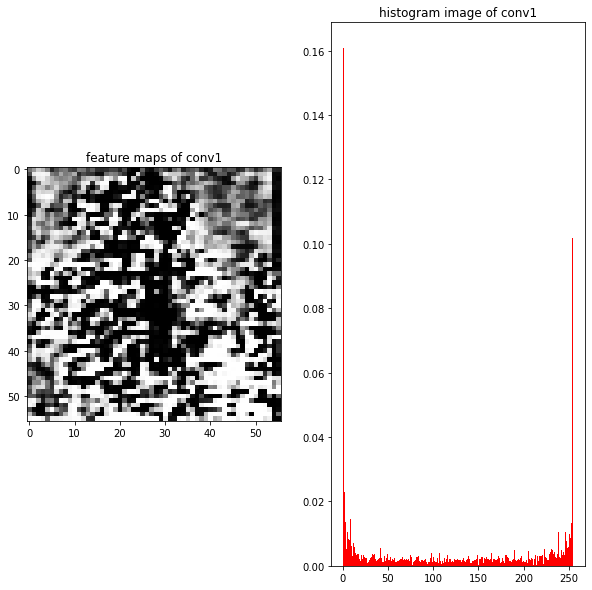

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

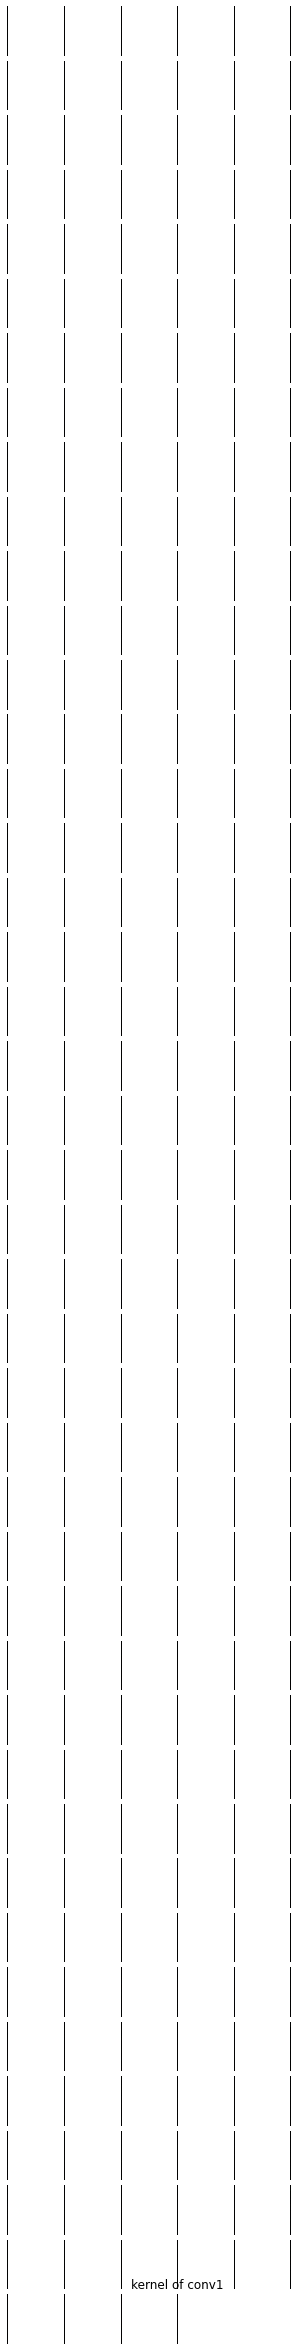

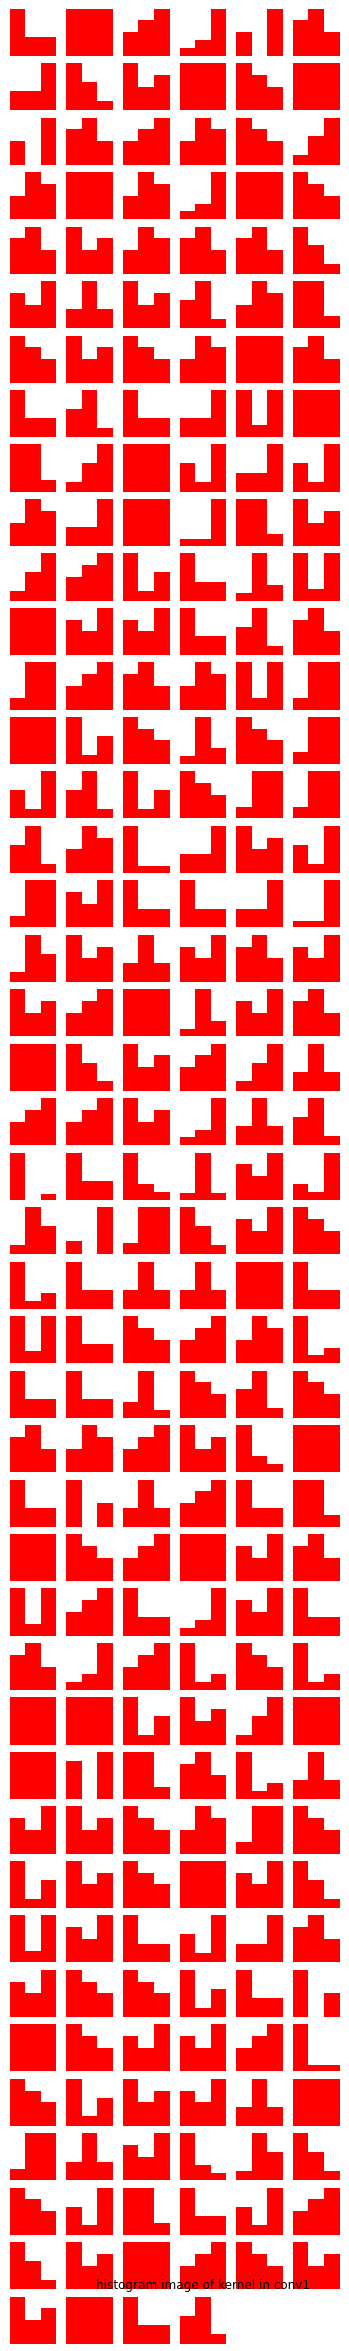

In [59]:
if __name__=='__main__':
    # get class
    selected_layers = [12]
    image_path = "./cluster_img/b34.jpg"
    feature_vis = FeatureVisualization(image_path, selected_layers)
    print (feature_vis.pretrained_model)

    feature_vis.get_feature()
    feature_vis.kernel_calling()